In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from svetlanna import elements
from svetlanna import SimulationParameters
from svetlanna import beam_generator
from examples import analytical_solutions as anso

In [2]:
plt.style.use('science')

Let us solve the direct problem of diffraction of a plane wave through a square aperture in the Fresnel approximation

In [3]:
# screen size
lx = 4
ly = 4

# distance between the screen and the aperture, mm
z = 600

# size of the aperture, mm
a = 1

# wavelength, mm
lam = 660 * 1e-6

wave_number = 2 * torch.pi / lam

# number of nodes
Nx = 1000
Ny = 1000

x = np.linspace(-lx/2, lx/2, Nx)
y = np.linspace(-ly/2, ly/2, Ny)
xv, yv = np.meshgrid(x, y)

params= SimulationParameters(
    x_size=lx,
    y_size=ly,
    x_nodes=Nx,
    y_nodes=Ny,
    wavelength=lam
)

dx = lx / Nx
dy = ly / Ny

In [4]:
# create plane wave
incident_field = beam_generator.PlaneWave(simulation_parameters=params).forward(
    distance=z, wave_vector=torch.tensor([0., 0., wave_number])
)

# create square aperture
square = elements.RectangularAperture(simulation_parameters=params, height=a, width=a)
aperture_shape = square.get_transmission_function()

# field after square aperture
transmission_field = square.forward(input_field=incident_field)

# field on the screen
output_field = elements.FreeSpace(
    simulation_parameters=params,
    distance=z,
    method='fresnel'
).forward(input_field=transmission_field)

# intensity distribution on the screen
intensity_output = torch.pow(torch.abs(output_field), 2).detach().numpy()


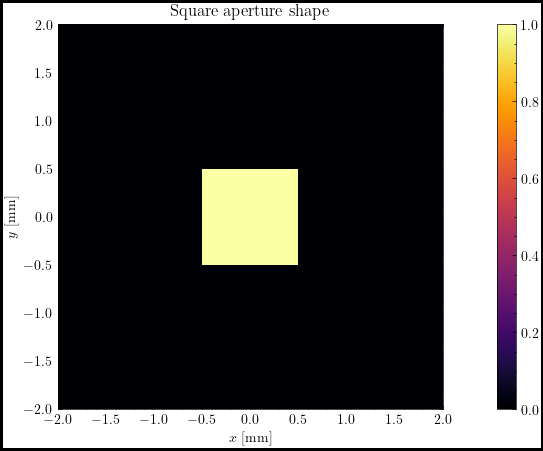

In [5]:
fig, ax = plt.subplots(figsize=(14, 5), edgecolor='black', linewidth=3,
                       frameon=True)
im1 = ax.pcolormesh(xv, yv, aperture_shape, cmap='inferno')
ax.set_aspect('equal')
ax.set_title('Square aperture shape')
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
fig.colorbar(im1)

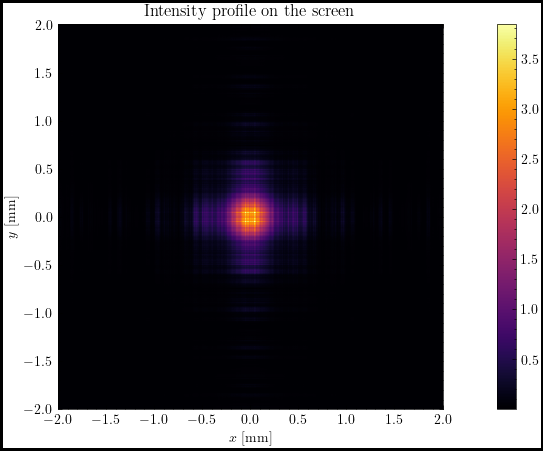

In [6]:
fig, ax = plt.subplots(figsize=(14, 5), edgecolor='black', linewidth=3,
                       frameon=True)
im1 = ax.pcolormesh(xv, yv, intensity_output, cmap='inferno')
ax.set_aspect('equal')
ax.set_title('Intensity profile on the screen')
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
fig.colorbar(im1)

Let us compare the rigorous analytical solution of the problem of diffraction of a plane wave on a square aperture in the Fresnel approximation with the numerical one.

In [7]:
# screen size
lx = 3
ly = 3

# distance between the aperture and the screen
z = 150

# size of the square aperture
a = 0.6

# wavelength
lam = 1064 * 1e-6

k = 2 * torch.pi / lam

# number of nodes
Nx = 500
Ny = 500

Let us look at the nature of the oscillations of the Fresnel integrals, through which the strict analytical solution is expressed.

In [8]:
import scipy as sp

x = np.linspace(-lx/2, lx/2, Nx)
y = np.linspace(-ly/2, ly/2, Ny)
xv, yv = np.meshgrid(x, y)

def cos_fresnel(t):
    return np.cos(np.pi*t**2/2)

def sin_fresnel(t):
    return np.sin(np.pi*t**2/2)

wave_number = 2*np.pi/lam

psi1 = -np.sqrt(wave_number/(np.pi*z))*(a/2 + x)
psi2 = np.sqrt(wave_number/(np.pi*z))*(a/2 - x)
eta1 = -np.sqrt(wave_number/(np.pi*z))*(a/2 + y)
eta2 = np.sqrt(wave_number/(np.pi*z))*(a/2 - y)

int_cos_fresnel_psi2 = np.array([sp.integrate.quad(cos_fresnel, 0, lim)[0] for lim in psi2])
int_cos_fresnel_psi1 = np.array([sp.integrate.quad(cos_fresnel, 0, lim)[0] for lim in psi1])

int_cos_fresnel_eta2 = np.array([sp.integrate.quad(cos_fresnel, 0, lim)[0] for lim in eta2])
int_cos_fresnel_eta1 = np.array([sp.integrate.quad(cos_fresnel, 0, lim)[0] for lim in eta1])

int_sin_fresnel_psi2 = np.array([sp.integrate.quad(sin_fresnel, 0, lim)[0] for lim in psi2])
int_sin_fresnel_psi1 = np.array([sp.integrate.quad(sin_fresnel, 0, lim)[0] for lim in psi1])

int_sin_fresnel_eta2 = np.array([sp.integrate.quad(sin_fresnel, 0, lim)[0] for lim in eta2])
int_sin_fresnel_eta1 = np.array([sp.integrate.quad(sin_fresnel, 0, lim)[0] for lim in eta1])


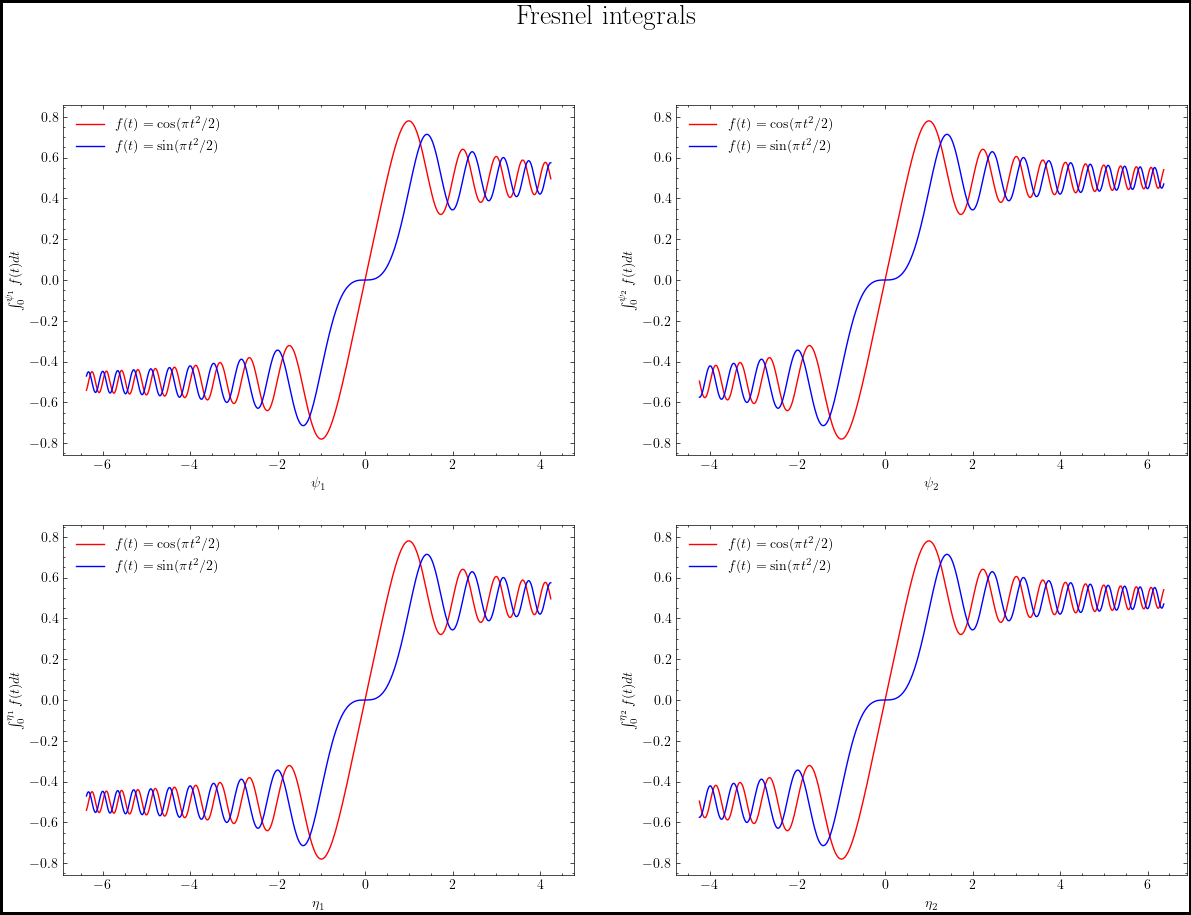

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(14.5, 10), edgecolor='black', linewidth=3,
                       frameon=True)
fig.suptitle('Fresnel integrals', fontsize=20)

ax[0, 0].plot(psi1, int_cos_fresnel_psi1, color='red', label=r'$f(t)=\cos(\pi t^2/2)$')
ax[0, 0].plot(psi1, int_sin_fresnel_psi1, color='blue', label=r'$f(t)=\sin(\pi t^2/2)$')
ax[0, 0].set_xlabel(r'$\psi_1$')
ax[0, 0].set_ylabel('$\int_0^{\psi_1}f(t)dt$')
ax[0, 0].legend()

ax[0, 1].plot(psi2, int_cos_fresnel_psi2, color='red', label=r'$f(t)=\cos(\pi t^2/2)$')
ax[0, 1].plot(psi2, int_sin_fresnel_psi2, color='blue', label=r'$f(t)=\sin(\pi t^2/2)$')
ax[0, 1].set_xlabel(r'$\psi_2$')
ax[0, 1].set_ylabel('$\int_0^{\psi_2}f(t)dt$')
ax[0, 1].legend()

ax[1, 0].plot(eta1, int_cos_fresnel_eta1, color='red', label=r'$f(t)=\cos(\pi t^2/2)$')
ax[1, 0].plot(eta1, int_sin_fresnel_eta1, color='blue', label=r'$f(t)=\sin(\pi t^2/2)$')
ax[1, 0].set_xlabel(r'$\eta_1$')
ax[1, 0].set_ylabel('$\int_0^{\eta_1}f(t)dt$')
ax[1, 0].legend()

ax[1, 1].plot(eta2, int_cos_fresnel_eta2, color='red', label=r'$f(t)=\cos(\pi t^2/2)$')
ax[1, 1].plot(eta2, int_sin_fresnel_eta2, color='blue', label=r'$f(t)=\sin(\pi t^2/2)$')
ax[1, 1].set_xlabel(r'$\eta_2$')
ax[1, 1].set_ylabel('$\int_0^{\eta_2}f(t)dt$')
ax[1, 1].legend()

In [10]:
from tqdm import tqdm

nodes_array = np.logspace(1, 3, 300, dtype=int)
nodes_array = np.append(nodes_array, np.linspace(1010, 6000, 70, dtype=int))

std_list = []
energy_numeric_list = []
energy_analytic_list = []

for n in tqdm(nodes_array):

    params= SimulationParameters(
        x_size=lx,
        y_size=ly,
        x_nodes=n,
        y_nodes=n,
        wavelength=lam
    )

    dx = lx / n
    dy = ly / n

    incident_field = beam_generator.PlaneWave(simulation_parameters=params).forward(distance=z, wave_vector=torch.tensor([0., 0., wave_number]))

    # field after square aperture
    transmission_field = elements.RectangularAperture(
        simulation_parameters=params,
        height=a,
        width=a
    ).forward(input_field=incident_field)

    # field on the screen
    output_field = elements.FreeSpace(
        simulation_parameters=params,
        distance=z,
        method='fresnel'
    ).forward(input_field=transmission_field)

    # intensity on the screen
    intensity_output = torch.pow(torch.abs(output_field), 2).detach().numpy()

    rect_int = anso.SquareFresnel(
        distance=z,
        x_size=lx,
        y_size=ly,
        x_nodes=n,
        y_nodes=n,
        square_size=a,
        wavelength=lam
    )

    intensity_analytic = rect_int.intensity()

    standard_deviation = np.std(intensity_analytic - intensity_output)
    energy_analytic = np.sum(intensity_analytic) * dx * dy
    energy_numeric = np.sum(intensity_output) * dx * dy

    std_list.append(standard_deviation)
    energy_analytic_list.append(energy_analytic)
    energy_numeric_list.append(energy_numeric)

100%|██████████| 370/370 [14:21<00:00,  2.33s/it] 


In [11]:
std_list = np.array(std_list)
energy_numeric_list = np.array(energy_numeric_list)
energy_analytic_list = np.array(energy_analytic_list)
relative_error = np.abs((energy_analytic_list - energy_numeric_list)/ energy_analytic_list)

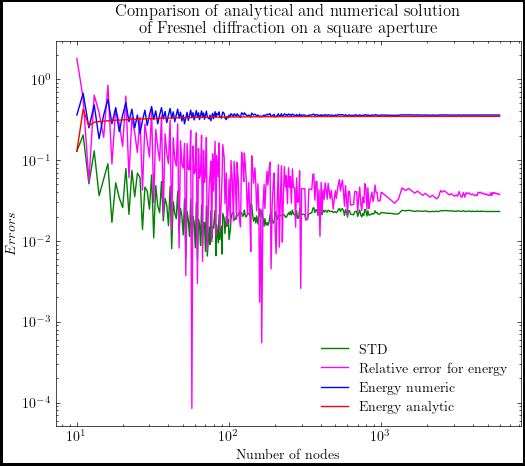

In [13]:
fig, ax = plt.subplots(figsize=(6, 5), edgecolor='black', linewidth=3,
                       frameon=True)
ax.loglog(nodes_array, std_list, color='green', label='STD')
ax.loglog(nodes_array, relative_error, color='magenta', label='Relative error for energy')
ax.loglog(nodes_array, energy_numeric_list, color='blue', label='Energy numeric')
ax.loglog(nodes_array, energy_analytic_list, color='red', label='Energy analytic')

ax.set_title('Comparison of analytical and numerical solution \n of Fresnel diffraction on a square aperture')
ax.set_xlabel('Number of nodes')
ax.set_ylabel(r'$Errors$')
ax.legend()